### Advanced Data Transformation with Polars

The examples below use `.head()` to reduce the output to a few rows and take up less space.
If you want the full output, remove `.head()` from the code.

This notebooked is divided into sections. If your code editor supports it, you can use the **Outline** functionality to easily go to the code section you are interested in.

For more details on Polars functions, check out the Polars API reference: https://pola-rs.github.io/polars/py-polars/html/reference/index.html

In [104]:
import polars as pl

# Configure the number of characters to show for each string column
pl.Config.set_fmt_str_lengths(50)

polars.config.Config

#### List operations

In [105]:
data = {
    "branch": ['A', 'B', 'C', 'D'],
    "employees": [['John', 'Lisa', 'Sam'], ['Lisa', 'Alex'], ['Sam', 'Alex', 'John'], ['Lisa', 'Sam']],
    "weekly_sales": [[1200, 2500, 700], [1500, 2700], [1800, 2000, 900], [1700, 2100]],
    "stock_items": [['Item1', 'Item2'], ['Item1', 'Item3'], ['Item2', 'Item3'], ['Item1', 'Item2', 'Item3']],
    "customer_rating": [[3, 4, 4], [5, 4], [4, 3, 3], [5, 5]]
}

df_retail = pl.DataFrame(data)

df_retail

branch,employees,weekly_sales,stock_items,customer_rating
str,list[str],list[i64],list[str],list[i64]
"""A""","[""John"", ""Lisa"", ""Sam""]","[1200, 2500, 700]","[""Item1"", ""Item2""]","[3, 4, 4]"
"""B""","[""Lisa"", ""Alex""]","[1500, 2700]","[""Item1"", ""Item3""]","[5, 4]"
"""C""","[""Sam"", ""Alex"", ""John""]","[1800, 2000, 900]","[""Item2"", ""Item3""]","[4, 3, 3]"
"""D""","[""Lisa"", ""Sam""]","[1700, 2100]","[""Item1"", ""Item2"", ""Item3""]","[5, 5]"


In [106]:
# join the employees working in each branch in a single string

df_retail.with_columns(pl.col("employees").list.join(', '))

branch,employees,weekly_sales,stock_items,customer_rating
str,str,list[i64],list[str],list[i64]
"""A""","""John, Lisa, Sam""","[1200, 2500, 700]","[""Item1"", ""Item2""]","[3, 4, 4]"
"""B""","""Lisa, Alex""","[1500, 2700]","[""Item1"", ""Item3""]","[5, 4]"
"""C""","""Sam, Alex, John""","[1800, 2000, 900]","[""Item2"", ""Item3""]","[4, 3, 3]"
"""D""","""Lisa, Sam""","[1700, 2100]","[""Item1"", ""Item2"", ""Item3""]","[5, 5]"


In [107]:
# check which branch has Item1 in stock

df_retail.select(
    'stock_items',
    has_item1 = pl.col("stock_items").list.contains("Item1")
    )

stock_items,has_item1
list[str],bool
"[""Item1"", ""Item2""]",true
"[""Item1"", ""Item3""]",true
"[""Item2"", ""Item3""]",false
"[""Item1"", ""Item2"", ""Item3""]",true


In [108]:
# count how many ratings of 5 each branch has

df_retail.select(
    'customer_rating',
    count_ratings_of_5 = pl.col("customer_rating").list.count_match(5)
    )

customer_rating,count_ratings_of_5
list[i64],u32
"[3, 4, 4]",0
"[5, 4]",1
"[4, 3, 3]",0
"[5, 5]",2


In [109]:
# calculate the change in sales at every change of employee

df_retail.select(
    'weekly_sales',
    change_in_sales = pl.col("weekly_sales").list.diff()
    )

weekly_sales,change_in_sales
list[i64],list[i64]
"[1200, 2500, 700]","[null, 1300, -1800]"
"[1500, 2700]","[null, 1200]"
"[1800, 2000, 900]","[null, 200, -1100]"
"[1700, 2100]","[null, 400]"


In [110]:
# i can visualize only some values from a list using head

df_retail.select(
    pl.col('customer_rating').list.head(2)
)   

customer_rating
list[i64]
"[3, 4]"
"[5, 4]"
"[4, 3]"
"[5, 5]"


In [111]:
# I can visualize the maximum value using max

df_retail.select(
    pl.col('weekly_sales').list.max()
)

weekly_sales
i64
2500
2700
2000
2100


In [112]:
# I can sort the values, and take the second biggest

df_retail.select(
    pl.col('weekly_sales').list.sort().list.take(1)
)

weekly_sales
list[i64]
[1200]
[2700]
[1800]
[2100]


In [113]:
# I can only the unique values

df_retail.select(
    pl.col('customer_rating').list.unique()
)

customer_rating
list[i64]
"[3, 4]"
"[4, 5]"
"[3, 4]"
[5]


In [114]:
# for functions not available in the list namespace, I can use eval and use all expressions
# inside pl.eval, I can identify the list with pl.element()
# for example, I can rank the sales

df_retail.select(
    'weekly_sales',
    ranked_sales = pl.col('weekly_sales').list.eval(pl.element().rank(method="dense", descending=True))
    )


weekly_sales,ranked_sales
list[i64],list[u32]
"[1200, 2500, 700]","[2, 1, 3]"
"[1500, 2700]","[2, 1]"
"[1800, 2000, 900]","[2, 1, 3]"
"[1700, 2100]","[2, 1]"


In [115]:
# using pl.eval I can filter for sales equal or bigger than 2500
# note that here I am using pl.element() twice, the first time to identify the list, the second time to identify the element

df_retail.select(
    'weekly_sales',
    filtered_sales = pl.col('weekly_sales').list.eval(pl.element().filter(pl.element()>= 2500))
)

weekly_sales,filtered_sales
list[i64],list[i64]
"[1200, 2500, 700]",[2500]
"[1500, 2700]",[2700]
"[1800, 2000, 900]",[]
"[1700, 2100]",[]


#### String operations

In [116]:
# Data
data = {
    "customer_id": ["C001", "C002", "C003", "C004", "C005"],
    "email": ["john.doe@example.com", "sarah.connor@shopnow.com", "jack.sparrow@onlineshopping.net", "harry.potter@buyonline.org", "lisa.simpson@webshop.com"],
    "feedback": [
        "The PRODUCT-X1 is AMAZING. I love it.",
        "Didn't like product-x2, poor quality. Product-x1 is better.",
        "The product-x1 is fantastic. Super happy with it.",
        "The service was bad. Not happy with PRODUCT-M1. Just as bad as PRODUCT-M2.",
        "Love PRODUCT-X1, worth every penny!",
    ],
    "product_id": ["P001", "P002", "P001", "M001", "P001"],
    "order_date": ["2023-06-01", "2023-06-02", "2023-06-03", "2023-06-04", "2023-06-05"],
    "transaction_details": ['{"price": 200.0, "shipping": {"type": "express", "cost": 20.0}}',
        '{"price": 150.0, "shipping": {"type": "standard", "cost": 10.0}}',
        '{"price": 200.0, "shipping": {"type": "express", "cost": 20.0}}',
        '{"price": 250.0, "shipping": {"type": "standard", "cost": 10.0}}',
        '{"price": 200.0, "shipping": {"type": "express", "cost": 20.0}}'],
}

# Create DataFrame
df_feedback = pl.DataFrame(data)

df_feedback

customer_id,email,feedback,product_id,order_date,transaction_details
str,str,str,str,str,str
"""C001""","""john.doe@example.com""","""The PRODUCT-X1 is AMAZING. I love it.""","""P001""","""2023-06-01""","""{""price"": 200.0, ""shipping"": {""type"": ""express"", …"
"""C002""","""sarah.connor@shopnow.com""","""Didn't like product-x2, poor quality. Product-x1 …","""P002""","""2023-06-02""","""{""price"": 150.0, ""shipping"": {""type"": ""standard"",…"
"""C003""","""jack.sparrow@onlineshopping.net""","""The product-x1 is fantastic. Super happy with it.…","""P001""","""2023-06-03""","""{""price"": 200.0, ""shipping"": {""type"": ""express"", …"
"""C004""","""harry.potter@buyonline.org""","""The service was bad. Not happy with PRODUCT-M1. J…","""M001""","""2023-06-04""","""{""price"": 250.0, ""shipping"": {""type"": ""standard"",…"
"""C005""","""lisa.simpson@webshop.com""","""Love PRODUCT-X1, worth every penny!""","""P001""","""2023-06-05""","""{""price"": 200.0, ""shipping"": {""type"": ""express"", …"


In [117]:
# to lowercase

df_feedback.select(
    pl.col('feedback').str.to_lowercase(),
)

feedback
str
"""the product-x1 is amazing. i love it."""
"""didn't like product-x2, poor quality. product-x1 …"
"""the product-x1 is fantastic. super happy with it.…"
"""the service was bad. not happy with product-m1. j…"
"""love product-x1, worth every penny!"""


In [118]:
# filter for rows containing 'service' or 'quality'

df_feedback.filter(
    pl.col('feedback').str.contains('service|quality')
)

customer_id,email,feedback,product_id,order_date,transaction_details
str,str,str,str,str,str
"""C002""","""sarah.connor@shopnow.com""","""Didn't like product-x2, poor quality. Product-x1 …","""P002""","""2023-06-02""","""{""price"": 150.0, ""shipping"": {""type"": ""standard"",…"
"""C004""","""harry.potter@buyonline.org""","""The service was bad. Not happy with PRODUCT-M1. J…","""M001""","""2023-06-04""","""{""price"": 250.0, ""shipping"": {""type"": ""standard"",…"


In [119]:
# filter for products starting with 'M'

df_feedback.filter(
    pl.col('product_id').str.starts_with('M')
)

customer_id,email,feedback,product_id,order_date,transaction_details
str,str,str,str,str,str
"""C004""","""harry.potter@buyonline.org""","""The service was bad. Not happy with PRODUCT-M1. J…","""M001""","""2023-06-04""","""{""price"": 250.0, ""shipping"": {""type"": ""standard"",…"


In [120]:
# Extract product names from the feedback column using Regex

df_feedback.select(
    products_mentioned = pl.col('feedback').str.extract_all(r"(?i)(product[-][\w\d]+)")
)

products_mentioned
list[str]
"[""PRODUCT-X1""]"
"[""product-x2"", ""Product-x1""]"
"[""product-x1""]"
"[""PRODUCT-M1"", ""PRODUCT-M2""]"
"[""PRODUCT-X1""]"


In [121]:
# Extract product names from the feedback columns and convert to lowercase

df_feedback.select(
    products_mentioned = pl.col('feedback').str.extract_all(r"(?i)(product[-][\w\d]+)").list.eval(pl.element().str.to_lowercase())
)

products_mentioned
list[str]
"[""product-x1""]"
"[""product-x2"", ""product-x1""]"
"[""product-x1""]"
"[""product-m1"", ""product-m2""]"
"[""product-x1""]"


In [122]:
# keep only 2 characters to hide confidential information

df_feedback.select(
    email_sanitized = pl.col("email").str.replace(r"^(..).*(@.*)$", r"$1$2")
)

email_sanitized
str
"""jo@example.com"""
"""sa@shopnow.com"""
"""ja@onlineshopping.net"""
"""ha@buyonline.org"""
"""li@webshop.com"""


In [123]:
# another way to hide confidential information is to use a hash function
# careful: hashing is vulnerable to a brute force attack so it does not guarantee confidentiality

df_feedback.select(
    email_sanitized = pl.col("email").hash()
)

email_sanitized
u64
9259825263913001176
17451028542328997735
8060747887327259745
11270021373210591822
16256934851045840297


In [124]:
# we can split the email between the username and the domain

df_feedback.select(
    username = pl.col("email").str.split("@").list.get(0),
    domain = pl.col("email").str.split("@").list.get(1)
)

username,domain
str,str
"""john.doe""","""example.com"""
"""sarah.connor""","""shopnow.com"""
"""jack.sparrow""","""onlineshopping.net"""
"""harry.potter""","""buyonline.org"""
"""lisa.simpson""","""webshop.com"""


In [125]:
# we can convert the transaction details column from a JSON to a struct

df_feedback.select(
    transaction_details_as_struct = pl.col("transaction_details").str.json_extract()
)

transaction_details_as_struct
struct[2]
"{200.0,{""express"",20.0}}"
"{150.0,{""standard"",10.0}}"
"{200.0,{""express"",20.0}}"
"{250.0,{""standard"",10.0}}"
"{200.0,{""express"",20.0}}"


In [126]:
# once the column is converted, we can access the price and shipping cost

df_feedback.select(
    transaction_details_as_struct = pl.col("transaction_details").str.json_extract()
).select(
    price = pl.col("transaction_details_as_struct").struct.field("price"),
    shipping_cost = pl.col("transaction_details_as_struct").struct.field("shipping").struct.field("cost")
)

price,shipping_cost
f64,f64
200.0,20.0
150.0,10.0
200.0,20.0
250.0,10.0
200.0,20.0


#### Time operations

In [127]:
nypd = pl.read_parquet('../datasets/nypd_crimes_from_2018.parquet')

In [128]:
nypd.head(5)

complaint_datetime,complaint_id,precinct,borough,crime_category,crime_description,victim_age_group,victim_race,victim_sex
str,str,i64,str,str,str,str,str,str
"""2019-09-04 09:00:00""","""469069650""",9,"""MANHATTAN""","""MISDEMEANOR""","""LARCENY,PETIT FROM AUTO""","""25-44""","""BLACK""","""F"""
"""2019-08-31 18:58:00""","""629841380""",50,"""BRONX""","""MISDEMEANOR""","""LARCENY,PETIT OF BICYCLE""","""45-64""","""UNKNOWN""","""M"""
"""2019-09-07 22:00:00""","""224389328""",19,"""MANHATTAN""","""MISDEMEANOR""","""LARCENY,PETIT FROM STORE-SHOPL""","""UNKNOWN""","""UNKNOWN""","""D"""
"""2019-08-31 18:00:00""","""211921838""",71,"""BROOKLYN""","""MISDEMEANOR""","""LARCENY,PETIT FROM AUTO""","""45-64""","""BLACK""","""F"""
"""2019-09-07 13:00:00""","""381754893""",62,"""BROOKLYN""","""MISDEMEANOR""","""CRIMINAL MISCHIEF 4TH, GRAFFIT""","""UNKNOWN""","""UNKNOWN""","""E"""


In [129]:
# We parse the datetime column to a datetime type

nypd = nypd.with_columns(
    pl.col('complaint_datetime').str.to_datetime("%Y-%m-%d %H:%M:%S")
)

In [130]:
# We can filter for specific dates with the datetime Python package

from datetime import datetime

nypd.filter(
    pl.col('complaint_datetime') > datetime(2020, 1, 1)
).head(5)

complaint_datetime,complaint_id,precinct,borough,crime_category,crime_description,victim_age_group,victim_race,victim_sex
datetime[μs],str,i64,str,str,str,str,str,str
2020-06-05 20:20:00,"""314830920""",75,null,"""FELONY""",null,"""25-44""","""BLACK""","""M"""
2021-05-17 10:00:00,"""473765131""",46,"""BRONX""","""MISDEMEANOR""","""PETIT LARCENY-CHECK FROM MAILB""","""45-64""","""WHITE HISPANIC""","""F"""
2021-05-29 23:10:00,"""251337835""",63,"""BROOKLYN""","""MISDEMEANOR""","""FORGERY,ETC.-MISD.""","""UNKNOWN""","""UNKNOWN""","""E"""
2021-06-08 21:00:00,"""894959678""",105,"""QUEENS""","""MISDEMEANOR""","""LARCENY,PETIT FROM AUTO""","""25-44""","""BLACK""","""F"""
2021-12-16 21:00:00,"""756737433""",42,"""BRONX""","""MISDEMEANOR""","""ASSAULT 3""","""45-64""","""BLACK HISPANIC""","""M"""


In [131]:
# We can filter for date ranges using the is_between method

nypd.filter(
    pl.col('complaint_datetime').is_between(datetime(2020, 1, 1), datetime(2020, 1, 10))
).head(5)

complaint_datetime,complaint_id,precinct,borough,crime_category,crime_description,victim_age_group,victim_race,victim_sex
datetime[μs],str,i64,str,str,str,str,str,str
2020-01-02 14:45:00,"""591348983""",18,"""MANHATTAN""","""FELONY""","""ROBBERY,OPEN AREA UNCLASSIFIED""","""18-24""","""WHITE""","""M"""
2020-01-03 15:33:00,"""211105656""",44,"""BRONX""","""MISDEMEANOR""","""LARCENY,PETIT BY CREDIT CARD U""","""18-24""","""BLACK""","""F"""
2020-01-07 11:20:00,"""364136331""",71,"""BROOKLYN""","""VIOLATION""","""HARASSMENT,SUBD 3,4,5""","""25-44""","""WHITE""","""F"""
2020-01-02 17:28:00,"""587143439""",42,"""BRONX""","""FELONY""","""CONTROLLED SUBSTANCE,INTENT TO""","""UNKNOWN""","""UNKNOWN""","""E"""
2020-01-03 06:55:00,"""669190911""",50,"""BRONX""","""MISDEMEANOR""","""LEAVING SCENE-ACCIDENT-PERSONA""","""65+""","""WHITE HISPANIC""","""M"""


In [132]:
# With the column parsed to a datetime type, we can extract the year, month, day, etc.
# Count of crimes per year

nypd.groupby(
    pl.col('complaint_datetime').dt.year().alias('year')
    ).count()

year,count
i32,u32
2018,462471
2019,458805
2020,413181
2021,448083
2022,520595


In [133]:
# Count of crimes per week of the year, show the 5 weeks with the most crimes

(
    nypd.groupby(
        pl.col('complaint_datetime').dt.week().alias('week'))
    .count()
    .sort('count', descending=True)
    .head(5)
)

week,count
u32,u32
37,47729
38,47481
44,47326
31,47156
27,47117


In [134]:
# There are multiple options for the days: day of the week, day of the month, and day of the year

nypd.with_columns(
    day_of_week = pl.col('complaint_datetime').dt.weekday(), # Monday is 1, Sunday is 7
    day_of_month = pl.col('complaint_datetime').dt.day(),
    day_of_year = pl.col('complaint_datetime').dt.ordinal_day()
).head(5)

complaint_datetime,complaint_id,precinct,borough,crime_category,crime_description,victim_age_group,victim_race,victim_sex,day_of_week,day_of_month,day_of_year
datetime[μs],str,i64,str,str,str,str,str,str,u32,u32,u32
2019-09-04 09:00:00,"""469069650""",9,"""MANHATTAN""","""MISDEMEANOR""","""LARCENY,PETIT FROM AUTO""","""25-44""","""BLACK""","""F""",3,4,247
2019-08-31 18:58:00,"""629841380""",50,"""BRONX""","""MISDEMEANOR""","""LARCENY,PETIT OF BICYCLE""","""45-64""","""UNKNOWN""","""M""",6,31,243
2019-09-07 22:00:00,"""224389328""",19,"""MANHATTAN""","""MISDEMEANOR""","""LARCENY,PETIT FROM STORE-SHOPL""","""UNKNOWN""","""UNKNOWN""","""D""",6,7,250
2019-08-31 18:00:00,"""211921838""",71,"""BROOKLYN""","""MISDEMEANOR""","""LARCENY,PETIT FROM AUTO""","""45-64""","""BLACK""","""F""",6,31,243
2019-09-07 13:00:00,"""381754893""",62,"""BROOKLYN""","""MISDEMEANOR""","""CRIMINAL MISCHIEF 4TH, GRAFFIT""","""UNKNOWN""","""UNKNOWN""","""E""",6,7,250


In [135]:
# Polars has another function to group dates together, which is truncate
# we can bin the dates into buckets of 2 years and 6 months

(
    nypd.groupby(
        pl.col('complaint_datetime').dt.truncate('2y6mo').alias('2year6months_bucket'))
    .count()
)


2year6months_bucket,count
datetime[μs],u32
2022-07-01 00:00:00,265927
2020-01-01 00:00:00,1115932
2017-07-01 00:00:00,921276


In [136]:
# Polars can work with time zones. For example, we can set the time zone to US/Eastern

nypd_localised = nypd.head(100).with_columns(
    complaint_datetime = pl.col('complaint_datetime').dt.replace_time_zone('US/Eastern', use_earliest=True)
)

nypd_localised.head(5)

complaint_datetime,complaint_id,precinct,borough,crime_category,crime_description,victim_age_group,victim_race,victim_sex
"datetime[μs, US/Eastern]",str,i64,str,str,str,str,str,str
2019-09-04 09:00:00 EDT,"""469069650""",9,"""MANHATTAN""","""MISDEMEANOR""","""LARCENY,PETIT FROM AUTO""","""25-44""","""BLACK""","""F"""
2019-08-31 18:58:00 EDT,"""629841380""",50,"""BRONX""","""MISDEMEANOR""","""LARCENY,PETIT OF BICYCLE""","""45-64""","""UNKNOWN""","""M"""
2019-09-07 22:00:00 EDT,"""224389328""",19,"""MANHATTAN""","""MISDEMEANOR""","""LARCENY,PETIT FROM STORE-SHOPL""","""UNKNOWN""","""UNKNOWN""","""D"""
2019-08-31 18:00:00 EDT,"""211921838""",71,"""BROOKLYN""","""MISDEMEANOR""","""LARCENY,PETIT FROM AUTO""","""45-64""","""BLACK""","""F"""
2019-09-07 13:00:00 EDT,"""381754893""",62,"""BROOKLYN""","""MISDEMEANOR""","""CRIMINAL MISCHIEF 4TH, GRAFFIT""","""UNKNOWN""","""UNKNOWN""","""E"""


In [137]:
# When we have a timezone, we can convert it to another timezone

nypd_localised.with_columns(
    complaint_datetime = pl.col('complaint_datetime').dt.convert_time_zone('UTC')
).head(5)

complaint_datetime,complaint_id,precinct,borough,crime_category,crime_description,victim_age_group,victim_race,victim_sex
"datetime[μs, UTC]",str,i64,str,str,str,str,str,str
2019-09-04 13:00:00 UTC,"""469069650""",9,"""MANHATTAN""","""MISDEMEANOR""","""LARCENY,PETIT FROM AUTO""","""25-44""","""BLACK""","""F"""
2019-08-31 22:58:00 UTC,"""629841380""",50,"""BRONX""","""MISDEMEANOR""","""LARCENY,PETIT OF BICYCLE""","""45-64""","""UNKNOWN""","""M"""
2019-09-08 02:00:00 UTC,"""224389328""",19,"""MANHATTAN""","""MISDEMEANOR""","""LARCENY,PETIT FROM STORE-SHOPL""","""UNKNOWN""","""UNKNOWN""","""D"""
2019-08-31 22:00:00 UTC,"""211921838""",71,"""BROOKLYN""","""MISDEMEANOR""","""LARCENY,PETIT FROM AUTO""","""45-64""","""BLACK""","""F"""
2019-09-07 17:00:00 UTC,"""381754893""",62,"""BROOKLYN""","""MISDEMEANOR""","""CRIMINAL MISCHIEF 4TH, GRAFFIT""","""UNKNOWN""","""UNKNOWN""","""E"""


In [138]:
# Polars also allows creating a date range and time range
# the date range method has various parameters including the inteval, whether to include the start and end date, and time zone
# the date_range method can be used to create a table, which is then joined existing data, for example with join_asof (which we'll see later)
# the date_range method can also be used to create lists inside a column of an existing table 

from datetime import date

pl.date_range(date(2020, 1, 1), date(2020, 1, 5), '1d', eager=True)    

date
date
2020-01-01
2020-01-02
2020-01-03
2020-01-04
2020-01-05


#### Change over time: Shift, diff, and pct_change

In [139]:
# We can shift rows up or down using shift, calculate difference using diff, and calculate percentage change using pct_change
# for example, we can look at the change in weekly crime counts

(
    nypd.groupby(
        pl.col('complaint_datetime').dt.truncate('1w').alias('week'))
    .count()
    .with_columns(
        pl.col('count').cast(pl.Int32),
        pl.col('week').cast(pl.Date))
    .sort('week', descending=True)
    .with_columns(
        prior_week = pl.col('week').shift(-1),
        prior_count = pl.col('count').shift(-1),
        change_count = pl.col('count').diff(-1),
        percent_change = pl.col('count').pct_change(-1).mul(100).round(0))
    .head(5)
)

week,count,prior_week,prior_count,change_count,percent_change
date,i32,date,i32,i32,f64
2022-12-26,6441,2022-12-19,7767,-1326,-17.0
2022-12-19,7767,2022-12-12,9149,-1382,-15.0
2022-12-12,9149,2022-12-05,9474,-325,-3.0
2022-12-05,9474,2022-11-28,9773,-299,-3.0
2022-11-28,9773,2022-11-21,9401,372,4.0


#### Horizontal expressions

In [140]:
# Let's start with a dataframe with one column per borough and one row per year

nypd_crimes_by_borough = (
     nypd.with_columns(
        year = pl.col('complaint_datetime').dt.year())
    .pivot(
        index='borough',
        columns= 'year',
        values = 'complaint_id',
        aggregate_function = pl.element().count())
)

nypd_crimes_by_borough

borough,2019,2018,2020,2021,2022
str,u32,u32,u32,u32,u32
"""MANHATTAN""",115595,114201,97145,110296,130973
"""BRONX""",100359,100615,90634,93825,110055
"""BROOKLYN""",131782,136397,119012,125895,144319
"""STATEN ISLAND""",18875,20799,17070,18848,22055
"""QUEENS""",91886,90155,88845,98070,112244
null,308,304,475,1149,949


In [141]:
# we can calculate expressions horizontally concatenating the columns as lists

nypd_crimes_by_borough.with_columns(
    avg_crime_count_since_2020 = 
    pl.concat_list('2020','2021','2022').list.mean()
)

borough,2019,2018,2020,2021,2022,avg_crime_count_since_2020
str,u32,u32,u32,u32,u32,f64
"""MANHATTAN""",115595,114201,97145,110296,130973,112804.666667
"""BRONX""",100359,100615,90634,93825,110055,98171.333333
"""BROOKLYN""",131782,136397,119012,125895,144319,129742.0
"""STATEN ISLAND""",18875,20799,17070,18848,22055,19324.333333
"""QUEENS""",91886,90155,88845,98070,112244,99719.666667
null,308,304,475,1149,949,857.666667


#### Advanced horizontal operations: reduce and fold

In [142]:
# we can reproduce the prior calculation using reduce

nypd_crimes_by_borough.select(
    'borough',
    avg_crime_count_since_2020 = pl.reduce(
        function=lambda accumulator, current: accumulator + current, 
        exprs=pl.col('2020','2021','2022') / 3)
)

borough,avg_crime_count_since_2020
str,f64
"""MANHATTAN""",112804.666667
"""BRONX""",98171.333333
"""BROOKLYN""",129742.0
"""STATEN ISLAND""",19324.333333
"""QUEENS""",99719.666667
null,857.666667


In [143]:
# a more useful example for reduce is to calculate the maximum crime count per borough

nypd_crimes_by_borough.select(
    'borough',
    max_yearly_crime_count = pl.reduce(
        function=lambda accumulator, current: pl.when(accumulator > current).then(accumulator).otherwise(current),
        exprs=pl.all().exclude('borough'))
)

borough,max_yearly_crime_count
str,u32
"""MANHATTAN""",130973
"""BRONX""",110055
"""BROOKLYN""",144319
"""STATEN ISLAND""",22055
"""QUEENS""",112244
null,1149


In [144]:
# fold has one additional parameter, which is the initial value of the accumulator
# for example we want to know the number of years where the crime count was above 100,000

nypd_crimes_by_borough.select(
    'borough',
    number_of_years_above_100k = pl.fold(
        acc = pl.lit(0), # initial value of the accumulator 0
        function=lambda accumulator, current: pl.when(current > 100000).then(accumulator + 1).otherwise(accumulator),
        exprs=pl.all().exclude('borough'))
)

borough,number_of_years_above_100k
str,i32
"""MANHATTAN""",4
"""BRONX""",3
"""BROOKLYN""",5
"""STATEN ISLAND""",0
"""QUEENS""",1
null,0


In [145]:
# one additional function is the cumfold function, which keeps track of intermediate values and returns a struct
# we can use cumfold to see how the maximum crime count changed over time

nypd_crimes_by_borough.select(
    'borough',
    max_yearly_crime_count = pl.cumfold(
        acc = pl.lit(0), # initial value of the accumulator 0
        function=lambda accumulator, current: pl.when(accumulator > current).then(accumulator).otherwise(current),
        exprs=pl.all().exclude('borough'))
)

borough,max_yearly_crime_count
str,struct[5]
"""MANHATTAN""","{115595,115595,115595,115595,130973}"
"""BRONX""","{100359,100615,100615,100615,110055}"
"""BROOKLYN""","{131782,136397,136397,136397,144319}"
"""STATEN ISLAND""","{18875,20799,20799,20799,22055}"
"""QUEENS""","{91886,91886,91886,98070,112244}"
null,"{308,308,475,1149,1149}"


#### Cumulative functions

In [146]:
sp500 = pl.read_csv('../datasets/SP500.csv', try_parse_dates=True)
btc = pl.read_csv('../datasets/BTC-USD.csv', try_parse_dates=True)

sp500 = sp500.with_columns(
    pl.col('Date').set_sorted()
)

btc = btc.with_columns(
    pl.col('Date').set_sorted()
)

In [147]:
sp500.head(5)

Date,Open,High,Low,Close,Adj Close,Volume
date,f64,f64,f64,f64,f64,i64
2019-01-02,2476.96,2519.49,2467.47,2510.03,2510.03,3733160000
2019-01-03,2491.92,2493.14,2443.96,2447.89,2447.89,3858830000
2019-01-04,2474.33,2538.07,2474.33,2531.94,2531.94,4234140000
2019-01-07,2535.61,2566.16,2524.56,2549.69,2549.69,4133120000
2019-01-08,2568.11,2579.82,2547.56,2574.41,2574.41,4120060000


In [148]:
# we can calculate the cumulative max of the adjusted close price

sp500.with_columns(
    pl.col("Adj Close").cummax().alias("cum_max")
).head(5)

Date,Open,High,Low,Close,Adj Close,Volume,cum_max
date,f64,f64,f64,f64,f64,i64,f64
2019-01-02,2476.96,2519.49,2467.47,2510.03,2510.03,3733160000,2510.03
2019-01-03,2491.92,2493.14,2443.96,2447.89,2447.89,3858830000,2510.03
2019-01-04,2474.33,2538.07,2474.33,2531.94,2531.94,4234140000,2531.94
2019-01-07,2535.61,2566.16,2524.56,2549.69,2549.69,4133120000,2549.69
2019-01-08,2568.11,2579.82,2547.56,2574.41,2574.41,4120060000,2574.41


In [149]:
# we can add a column with percent change, then calculate the cumulative return with cumprod

sp500.with_columns(
    pl.col("Adj Close").pct_change().alias("percent_change")
).with_columns(
    pl.col('percent_change').add(1).cumprod().sub(1).alias('cumulative_return_percent')
).head(5)

Date,Open,High,Low,Close,Adj Close,Volume,percent_change,cumulative_return_percent
date,f64,f64,f64,f64,f64,i64,f64,f64
2019-01-02,2476.96,2519.49,2467.47,2510.03,2510.03,3733160000,null,null
2019-01-03,2491.92,2493.14,2443.96,2447.89,2447.89,3858830000,-0.024757,-0.024757
2019-01-04,2474.33,2538.07,2474.33,2531.94,2531.94,4234140000,0.034336,0.008729
2019-01-07,2535.61,2566.16,2524.56,2549.69,2549.69,4133120000,0.00701,0.015801
2019-01-08,2568.11,2579.82,2547.56,2574.41,2574.41,4120060000,0.009695,0.025649


In [150]:
# for more advanced calculation, a cumulative_eval function is available
# cumulative_eval calculates a value for each row, by looking the current and all previous rows
# for example, I want to calculate the difference between the current close value and the maximum value to date

sp500.with_columns(
    pl.col('Adj Close').cumulative_eval(
        pl.element().last() - pl.element().max()
    ).suffix('_diff_from_max')
).head(5)

Date,Open,High,Low,Close,Adj Close,Volume,Adj Close_diff_from_max
date,f64,f64,f64,f64,f64,i64,f64
2019-01-02,2476.96,2519.49,2467.47,2510.03,2510.03,3733160000,0.0
2019-01-03,2491.92,2493.14,2443.96,2447.89,2447.89,3858830000,-62.14
2019-01-04,2474.33,2538.07,2474.33,2531.94,2531.94,4234140000,0.0
2019-01-07,2535.61,2566.16,2524.56,2549.69,2549.69,4133120000,0.0
2019-01-08,2568.11,2579.82,2547.56,2574.41,2574.41,4120060000,0.0


#### Rolling functions

In [151]:
# Rolling functions are similar to cumulative functions, but we are not limited to looking at all rows
# can specify a number of rows to look at using window_size
# window_size can also be a temporal interval, for example '3d' for 3 days
# the date column should be of type datetime so we can it to datetime first

from datetime import time

(
    sp500.head(5).with_columns(
        pl.col('Date').dt.combine(time(0)))
    .with_columns(
        pl.col('Adj Close').rolling_min(by='Date', window_size='3d').suffix('_rolling_min'))
)

Date,Open,High,Low,Close,Adj Close,Volume,Adj Close_rolling_min
datetime[μs],f64,f64,f64,f64,f64,i64,f64
2019-01-02 00:00:00,2476.96,2519.49,2467.47,2510.03,2510.03,3733160000,null
2019-01-03 00:00:00,2491.92,2493.14,2443.96,2447.89,2447.89,3858830000,2510.03
2019-01-04 00:00:00,2474.33,2538.07,2474.33,2531.94,2531.94,4234140000,2447.89
2019-01-07 00:00:00,2535.61,2566.16,2524.56,2549.69,2549.69,4133120000,2531.94
2019-01-08 00:00:00,2568.11,2579.82,2547.56,2574.41,2574.41,4120060000,2549.69


In [152]:
# we can also use number of rows instead of a temporal interval
# in that case, we pass an integer to window_size
# the result is not the same, because the number of rows is not the same as the number of days

(
    sp500.head(5).with_columns(
        pl.col('Adj Close').rolling_min(window_size=3).suffix('_rolling_min'))
)

Date,Open,High,Low,Close,Adj Close,Volume,Adj Close_rolling_min
date,f64,f64,f64,f64,f64,i64,f64
2019-01-02,2476.96,2519.49,2467.47,2510.03,2510.03,3733160000,null
2019-01-03,2491.92,2493.14,2443.96,2447.89,2447.89,3858830000,null
2019-01-04,2474.33,2538.07,2474.33,2531.94,2531.94,4234140000,2447.89
2019-01-07,2535.61,2566.16,2524.56,2549.69,2549.69,4133120000,2447.89
2019-01-08,2568.11,2579.82,2547.56,2574.41,2574.41,4120060000,2531.94


<Axes: xlabel='Date'>

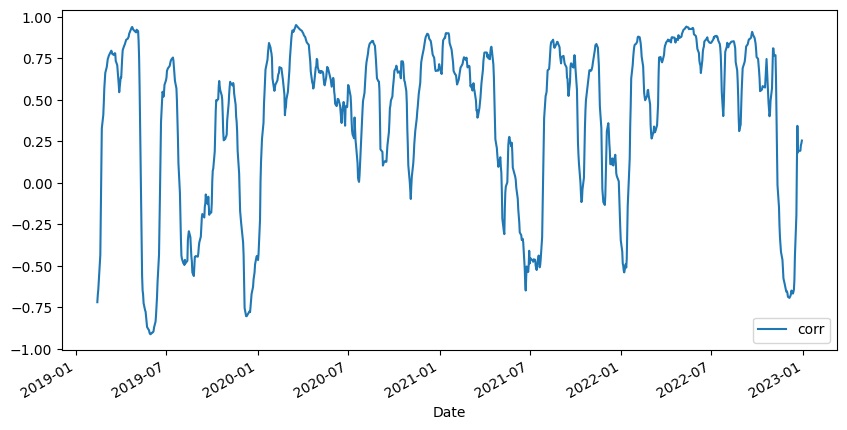

In [153]:
# we can join the 2 datasets together to calculate a rolling correlation between the S&P 500 and Bitcoin

sp500_btc = (
    sp500.select('Date',sp500='Adj Close')
    .join(btc.select('Date', btc='Adj Close'), on='Date', how='inner')
)

(
    sp500_btc
    .with_columns(
        corr = pl.rolling_corr('sp500', 'btc', window_size=30))
    .to_pandas()
    .plot(x='Date', y='corr', figsize=(10, 5))
)

In [154]:
# Finally, groupby rolling allows to define custom calculation for each rolling window
# In this example below, we calculate the rolling minimum, and the difference between the current value and the maximum value

(
    sp500.groupby_rolling(
        'Date',
        period='3d',
        closed='left')
    .agg(
        Adj_Close = pl.col('Adj Close').last(),
        Adj_Close_rolling_min = pl.col('Adj Close').min(),
        Adj_Close_diff_from_max = pl.col('Adj Close').last() - pl.col('Adj Close').max())
).head(10)

Date,Adj_Close,Adj_Close_rolling_min,Adj_Close_diff_from_max
date,f64,f64,f64
2019-01-02,null,null,null
2019-01-03,2510.03,2510.03,0.0
2019-01-04,2447.89,2447.89,-62.14
2019-01-07,2531.94,2531.94,0.0
2019-01-08,2549.69,2549.69,0.0
2019-01-09,2574.41,2549.69,0.0
2019-01-10,2584.96,2549.69,0.0
2019-01-11,2596.64,2574.41,0.0
2019-01-14,2596.26,2596.26,0.0


#### Dynamic groups: groupby_dynamic and groupby_rolling

In [155]:
# Groupby_dynamic and groupby_rolling are advanced functions for grouping data
# based on a time interval
# They are different from the cumulative and rolling functions because we reduce the number of rows

# 3 main parameters for groupby_dynamic:
# 1. every: how often we start a new interval
# 2. period: the length of the interval
# 3. offset: the offset of the interval

# Let's calculate the correlation between the S&P 500 and Bitcoin for each month
# Now I calculate only one value per month

(
    sp500_btc
    .groupby_dynamic(
        'Date',
        every='1mo',
        period='1mo')
    .agg(
        corr = pl.corr('sp500', 'btc'),
        from_date = pl.col('Date').min(),
        to_date = pl.col('Date').max())
    .head(5)
)

Date,corr,from_date,to_date
date,f64,date,date
2019-01-01,-0.73916,2019-01-02,2019-01-31
2019-02-01,0.820574,2019-02-01,2019-02-28
2019-03-01,0.599727,2019-03-01,2019-03-29
2019-04-01,0.65675,2019-04-01,2019-04-30
2019-05-01,-0.871049,2019-05-01,2019-05-31


In [156]:
# Let's now calculate the correlation between the S&P 500 and Bitcoin
# every month, but with a period of 2 months

(
    sp500_btc
    .groupby_dynamic(
        'Date',
        every='1mo',
        period='2mo')
    .agg(
        corr = pl.corr('sp500', 'btc'),
        from_date = pl.col('Date').min(),
        to_date = pl.col('Date').max())
    .head(5)
)

Date,corr,from_date,to_date
date,f64,date,date
2019-01-01,-0.083929,2019-01-02,2019-02-28
2019-02-01,0.840186,2019-02-01,2019-03-29
2019-03-01,0.923523,2019-03-01,2019-04-30
2019-04-01,-0.783081,2019-04-01,2019-05-31
2019-05-01,0.194892,2019-05-01,2019-06-28


In [157]:
# Finally, let's calculate the correlation between the S&P 500 and Bitcoin
# every 2 months, but with a period of 1 month

(
    sp500_btc
    .groupby_dynamic(
        'Date',
        every='2mo',
        period='1mo')
    .agg(
        corr = pl.corr('sp500', 'btc'),
        from_date = pl.col('Date').min(),
        to_date = pl.col('Date').max())
    .head(5)
)

Date,corr,from_date,to_date
date,f64,date,date
2019-01-01,-0.73916,2019-01-02,2019-01-31
2019-03-01,0.599727,2019-03-01,2019-03-29
2019-05-01,-0.871049,2019-05-01,2019-05-31
2019-07-01,-0.365423,2019-07-01,2019-07-31
2019-09-01,0.081172,2019-09-03,2019-09-30


#### Join with nearest key: asof_join

In [175]:
# Join_asof is a function that allows to join 2 datasets based on nearest keys
# For example, we can find the price of purchase for an S&P 500 ETF by looking at opening price for the next available date

trades = pl.DataFrame({
    'Date': [date(2019, 1, 4), date(2019, 1, 6), date(2019, 1, 11)],
    'Quantity': [10, -20, 30]
}).with_columns(
    pl.col('Date').set_sorted()
)

In [178]:
# Here are the prices of the S&P 500 as a reminder
sp500.select('Date', 'Open').head(10)

Date,Open
date,f64
2019-01-02,2476.96
2019-01-03,2491.92
2019-01-04,2474.33
2019-01-07,2535.61
2019-01-08,2568.11
2019-01-09,2580.0
2019-01-10,2573.51
2019-01-11,2588.11
2019-01-14,2580.31


In [180]:
trades.join_asof(sp500.select('Date', Price = 'Open'), on='Date', strategy='forward')

Date,Quantity,Price
date,i64,f64
2019-01-04,10,2474.33
2019-01-06,-20,2535.61
2019-01-11,30,2588.11
